Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Linear regression /data_for_lr.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

In [ ]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
print("Shape of data:",data.shape)

Shape of data: (699, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Splitting data

In [ ]:
# training input and output
train_input=np.array(data['x'].iloc[0:500]).reshape(500,1)
train_output=np.array(data['y'].iloc[0:500]).reshape(500,1)

#validation input and output data
test_input=np.array(data['x'].iloc[500:700]).reshape(199,1)
test_output=np.array(data['y'].iloc[500:700]).reshape(199,1)

In [ ]:
np.array(data['x'].iloc[0:500])

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [ ]:
np.array(data['x'].iloc[0:500]).reshape(500,1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [ ]:
print (f"training input data shape={train_input.shape}")
print (f"training output data shape={train_output.shape}")
print (f"testing input data shape={test_input.shape}")
print (f"testing input data shape={test_input.shape}")

training input data shape=(500, 1)
training output data shape=(500, 1)
testing input data shape=(199, 1)
testing input data shape=(199, 1)


**Linear Regression**

Foreward propogation

f(x)=mx+c

In [ ]:
def forward_propogation(train_input, parameters):
  m=parameters['m']
  c=parameters['c']

  predictions = (train_input*m)+c
  return predictions

Cost Function

=summation (1/2n(y-f(x))^2 )

In [ ]:
def cost_function(predictions,train_output):
  cost= np.mean((train_output-predictions)**2)*0.5
  return cost

Gradient Descent For BackPropogation

df=derivative(cost)wrt(f(x))= 1/n(f(x)-y)

derivative(f(x))wrt(m)=x

derivative(f(x))wrt(c)=1

dm=derivative(cost)wrt(m)=df * x

dc=derivative(cost)wrt(c)=df * 1

f(x) = y^  = mx+c = estimated output

In [ ]:
def backward_propogtion(train_input,train_output,predictions):
  derivatives=dict()

  df=predictions-train_output
  dm=np.mean(df*train_input)
  dc=np.mean(df*1)

  derivatives['dm']=dm
  derivatives['dc']=dc

  return derivatives

Update Prameters

m=m-(learning rate)*dm

c=c-(learning rate)*dc

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
  parameters['m']=parameters['m']-learning_rate*derivatives['dm']
  parameters['c']=parameters['c']-learning_rate*derivatives['dc']

  return parameters

Model Training

In [ ]:
def train(train_input, train_output, learning_rate, iters):
  # random parameters
  parameters={}
  parameters['m']=np.random.uniform(0,1)
  parameters['c']=np.random.uniform(0,1)

  plt.figure()

  #loss
  loss=[]

  #iterations
  for i in range(0,iters):
    print('Here we are')
    #forward propogation
    predictions = forward_propogation(train_input, parameters)

    #cost
    cost=cost_function(predictions, train_output)

    loss.append(cost)
    print(f" Iteration ={i+1} , Loss={  cost }")

    #plot
    fig,ax=plt.subplots()

   ## ax.plot(train_input, train_output,'+',label='Original')
   ##ax.plot(train_input, predictions,'+',label='Training')

    legend=ax.legend()

    plt.plot(train_input,train_output,'+',label='Original')
    plt.plot(train_input,predictions,'+',label='Training')

    plt.show()

    #back propogation
    derivatives=backward_propogtion(train_input,train_output,predictions)

    #update the parameters
    parameters=update_parameters(parameters, derivatives, learning_rate)

  return parameters,loss

Training

Here we are
 Iteration =1 , Loss=140.24444101828652


<Figure size 640x480 with 0 Axes>

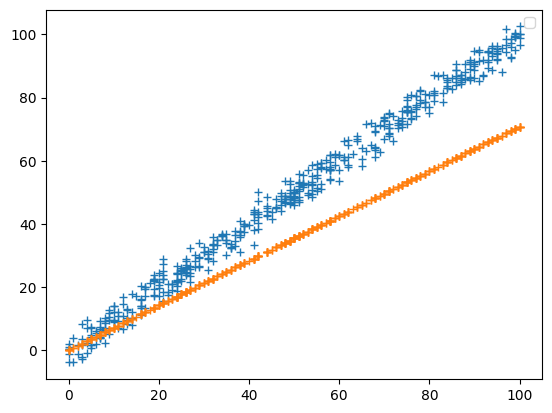

Here we are
 Iteration =2 , Loss=65.77058318357466


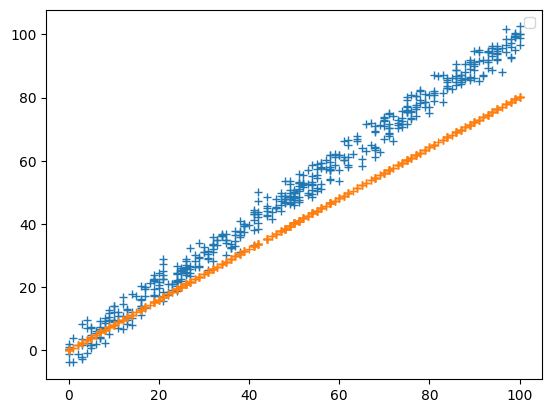

Here we are
 Iteration =3 , Loss=31.981711126700773


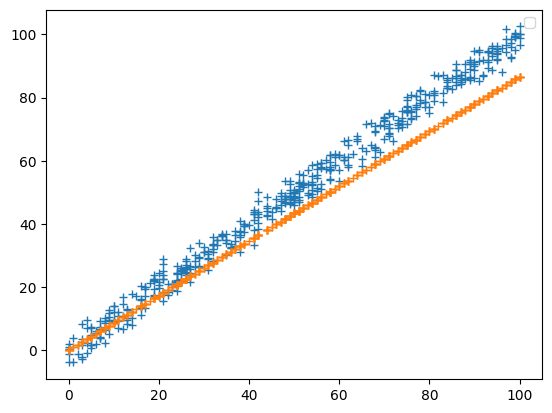

Here we are
 Iteration =4 , Loss=16.65166218161242


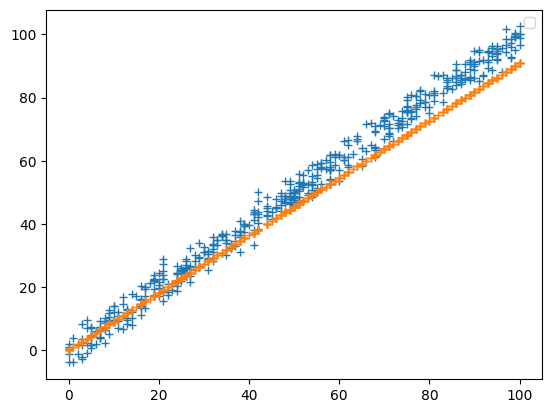

Here we are


 Iteration =5 , Loss=9.696401728107853


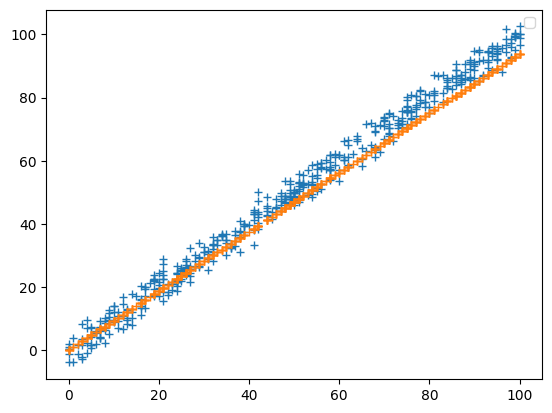

Here we are
 Iteration =6 , Loss=6.540792089509232


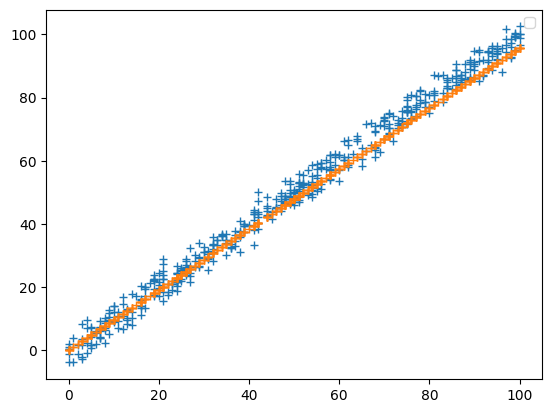

Here we are
 Iteration =7 , Loss=5.109088234296699


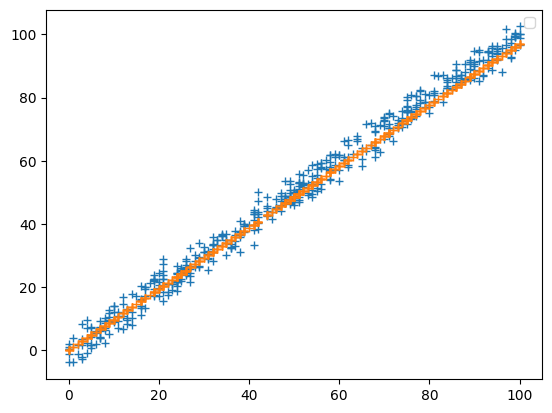

Here we are
 Iteration =8 , Loss=4.459522342488977


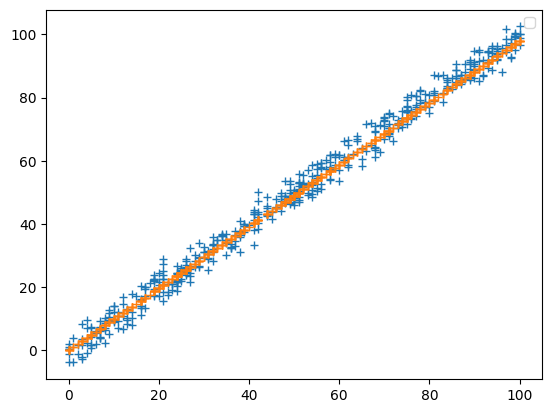

Here we are
 Iteration =9 , Loss=4.164813311019699


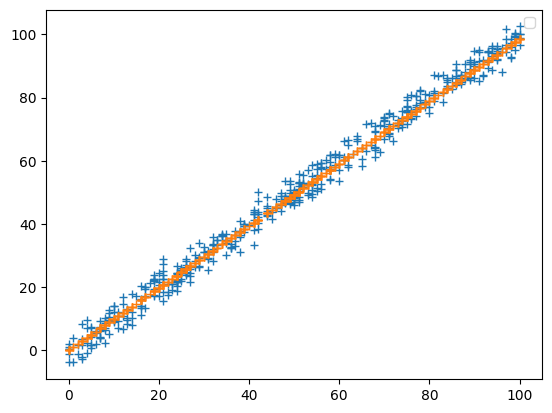

Here we are
 Iteration =10 , Loss=4.031103230153511


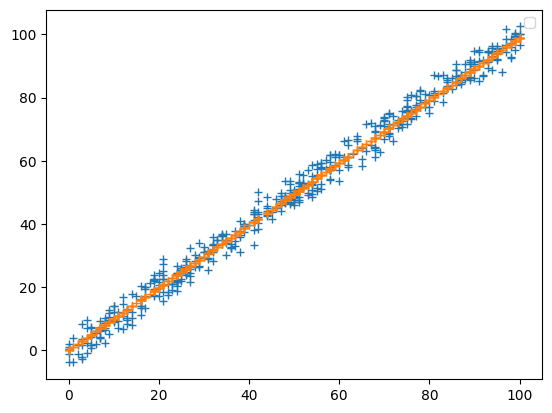

Here we are
 Iteration =11 , Loss=3.9704385515184537


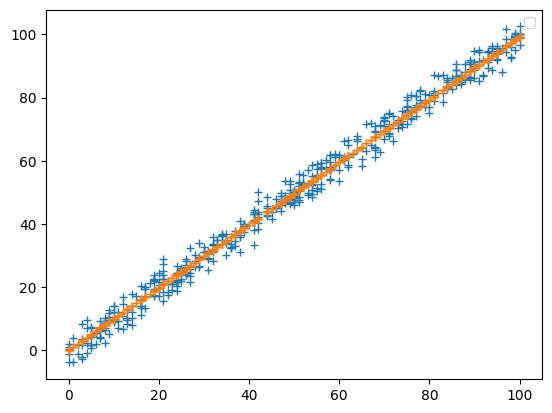

Here we are
 Iteration =12 , Loss=3.9429146527972017


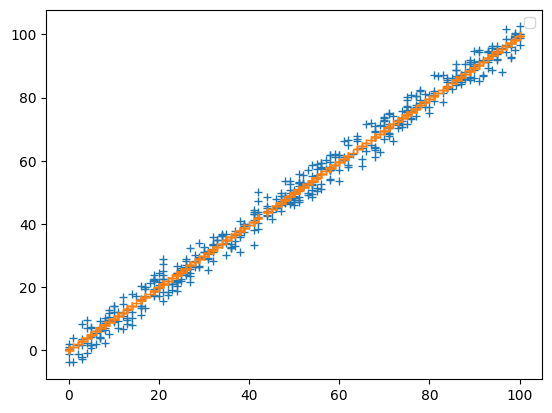

Here we are
 Iteration =13 , Loss=3.930426762644378


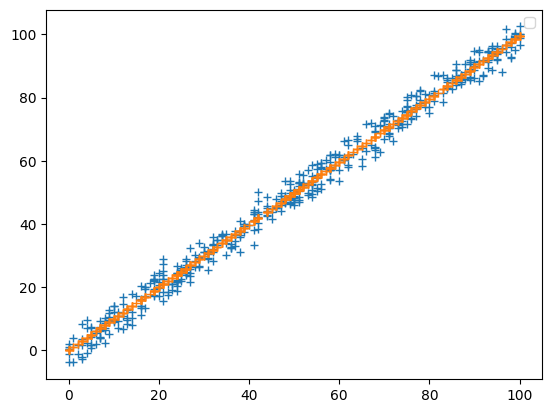

Here we are
 Iteration =14 , Loss=3.9247607262469937


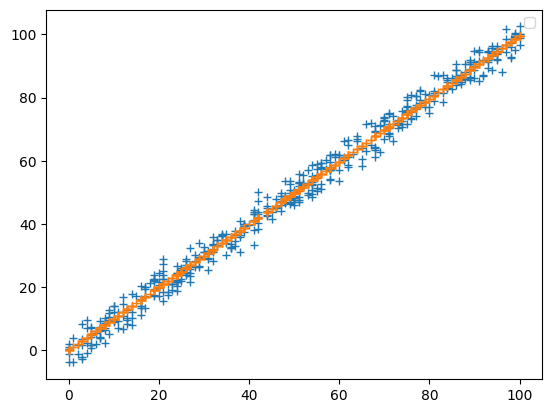

Here we are
 Iteration =15 , Loss=3.9221897724680566


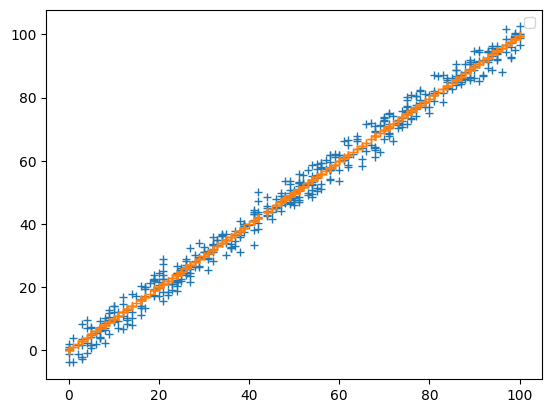

Here we are
 Iteration =16 , Loss=3.921023061114792


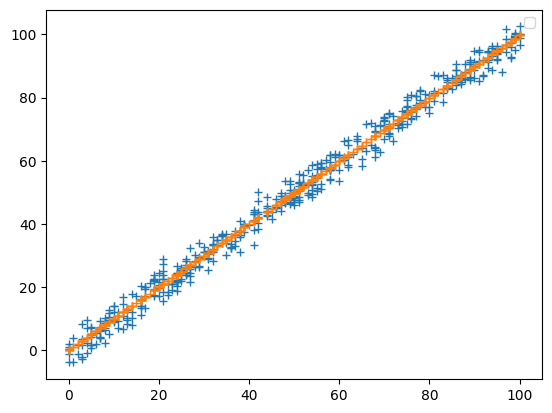

Here we are
 Iteration =17 , Loss=3.9204934561188884


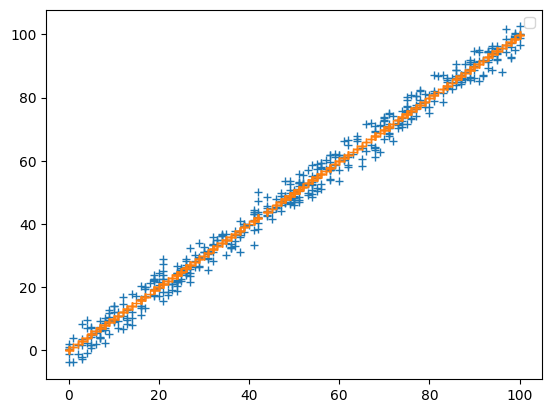

Here we are
 Iteration =18 , Loss=3.920252906996443


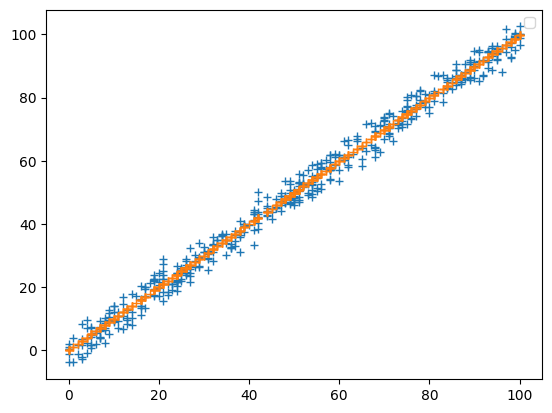

Here we are
 Iteration =19 , Loss=3.9201435028573925


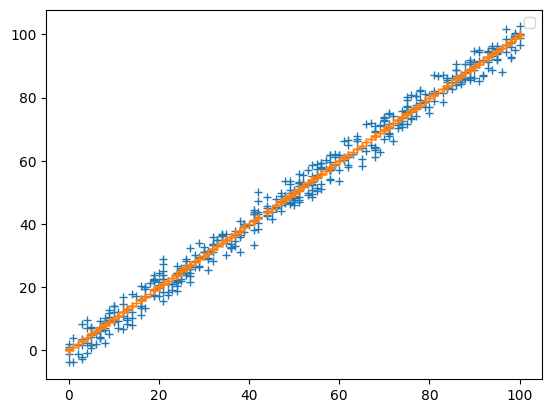

Here we are
 Iteration =20 , Loss=3.920093599356007


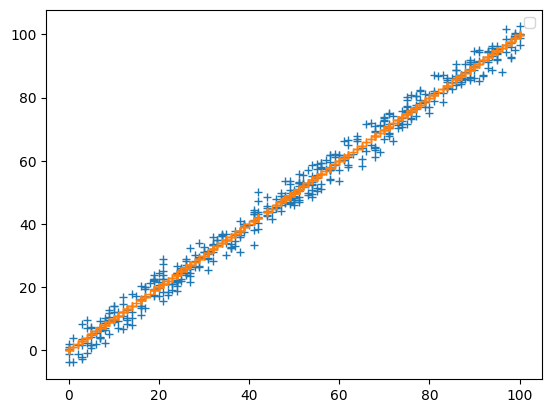

In [ ]:
parameters,loss=train(train_input, train_output, 0.0001, 20)

with a larger learning_rate

Here we are
 Iteration =1 , Loss=513.7624627471321


<Figure size 640x480 with 0 Axes>

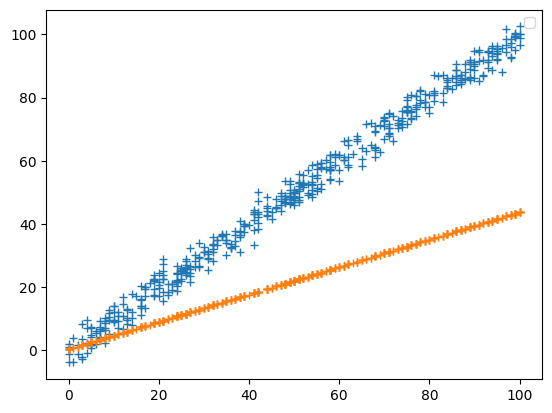

Here we are
 Iteration =2 , Loss=53990387.698437


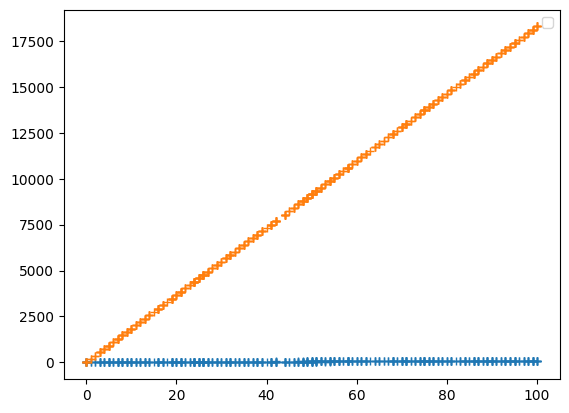

Here we are


 Iteration =3 , Loss=5717715560399.412


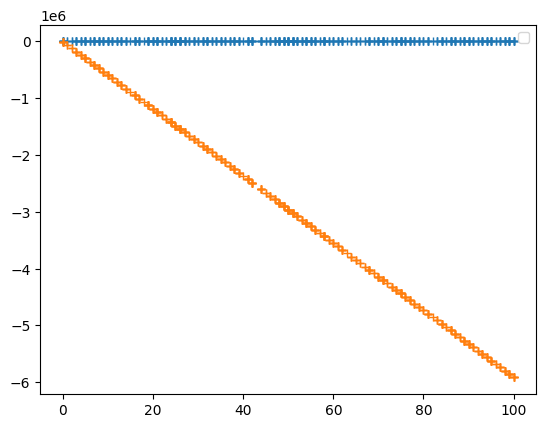

Here we are
 Iteration =4 , Loss=6.055202604381019e+17


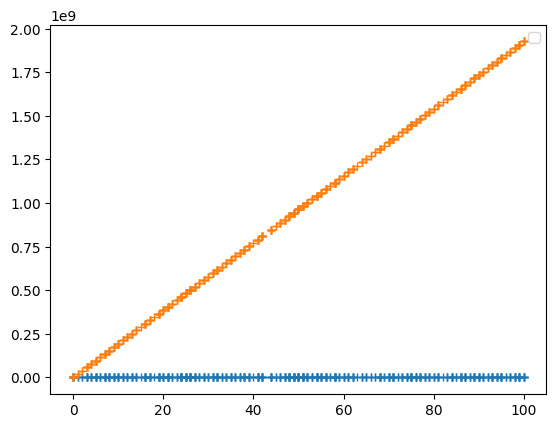

Here we are
 Iteration =5 , Loss=6.41260975520907e+22


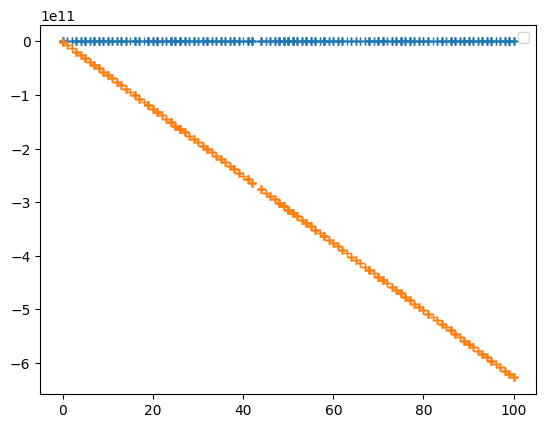

Here we are
 Iteration =6 , Loss=6.791112793294569e+27


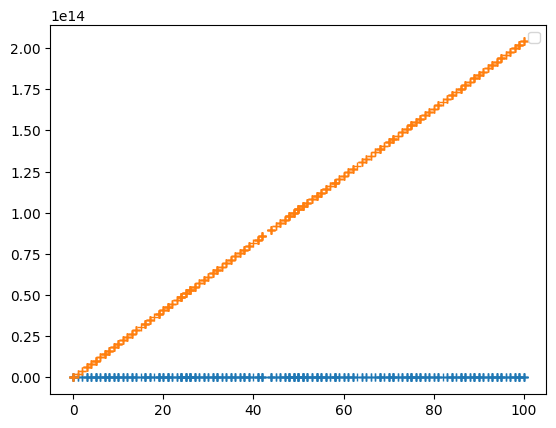

Here we are
 Iteration =7 , Loss=7.191956899261766e+32


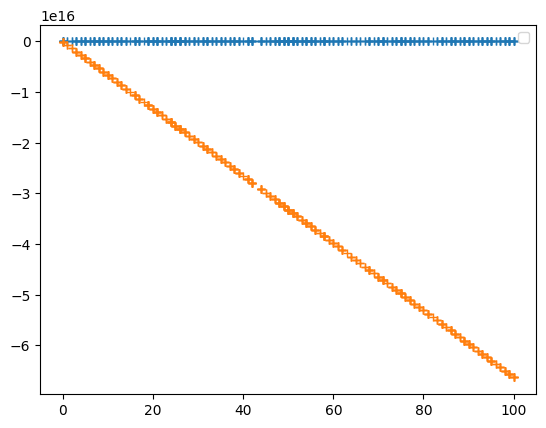

Here we are
 Iteration =8 , Loss=7.616460750278006e+37


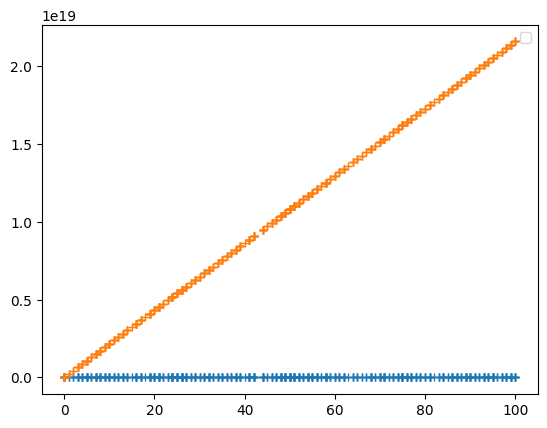

Here we are
 Iteration =9 , Loss=8.066020858172835e+42


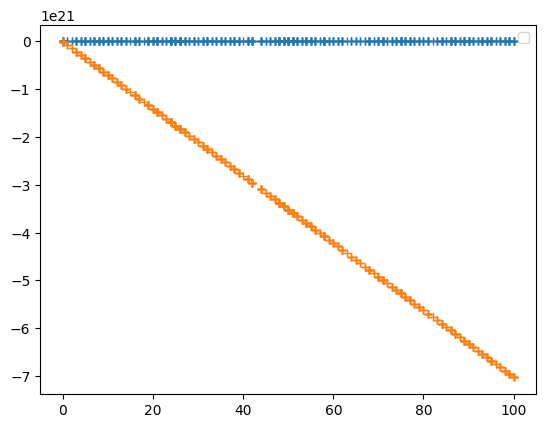

Here we are
 Iteration =10 , Loss=8.542116163613714e+47


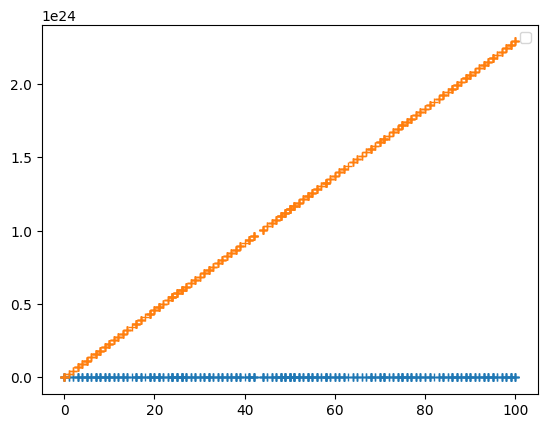

Here we are
 Iteration =11 , Loss=9.046312901452106e+52


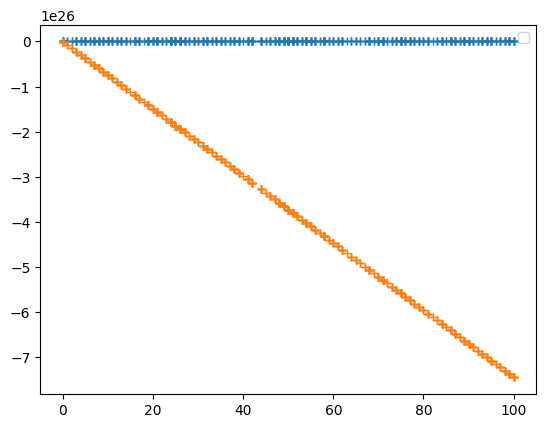

Here we are
 Iteration =12 , Loss=9.5802697532456e+57


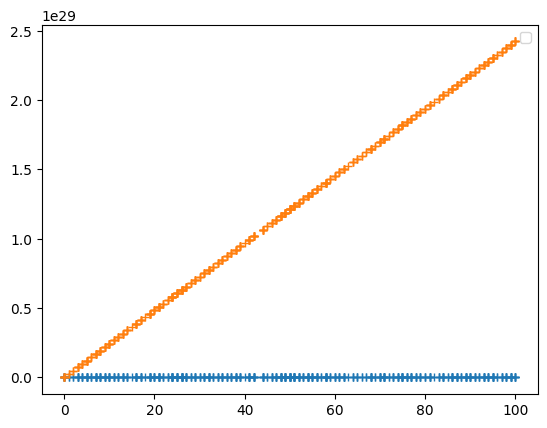

Here we are
 Iteration =13 , Loss=1.0145743303906702e+63


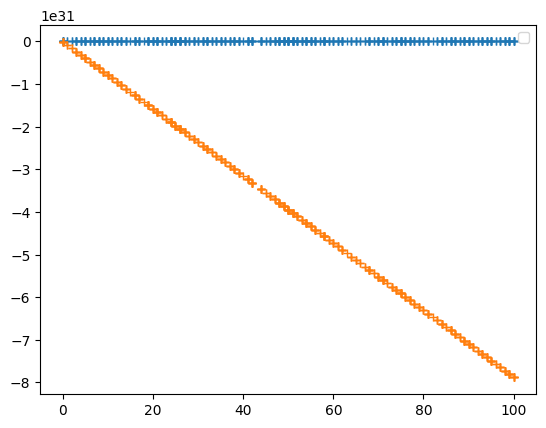

Here we are
 Iteration =14 , Loss=1.0744593820429219e+68


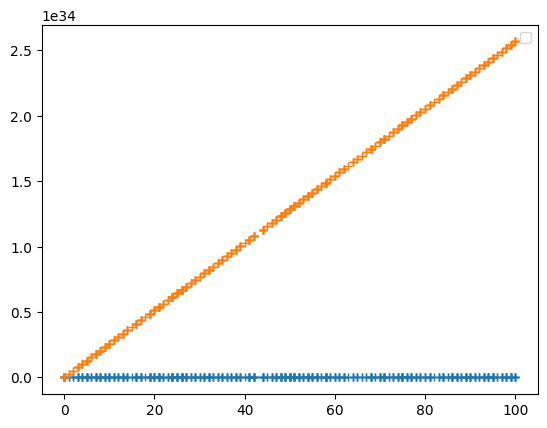

Here we are
 Iteration =15 , Loss=1.1378791371702874e+73


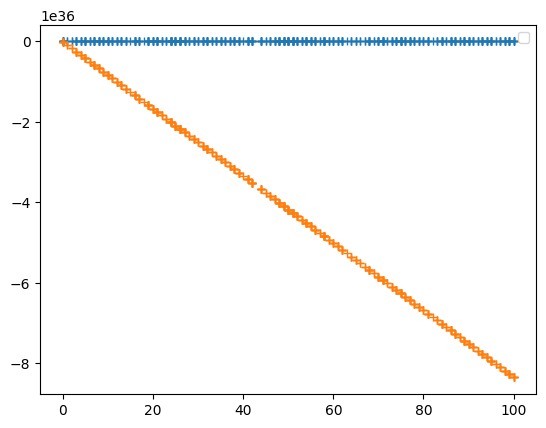

Here we are
 Iteration =16 , Loss=1.2050422309548744e+78


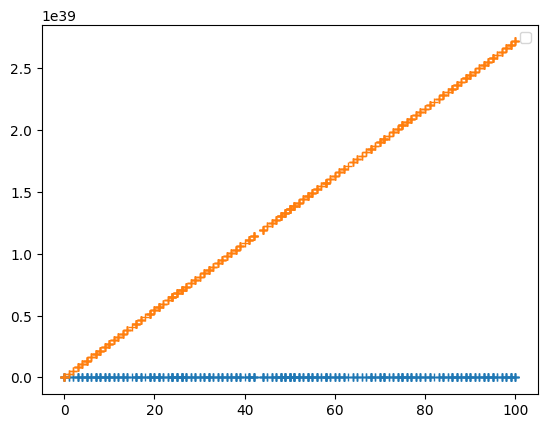

Here we are
 Iteration =17 , Loss=1.276169613229657e+83


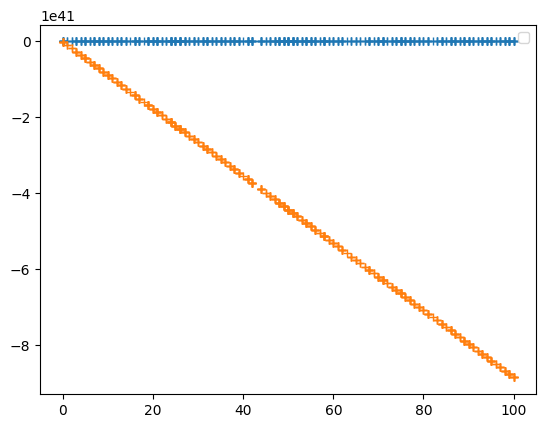

Here we are
 Iteration =18 , Loss=1.3514952753483357e+88


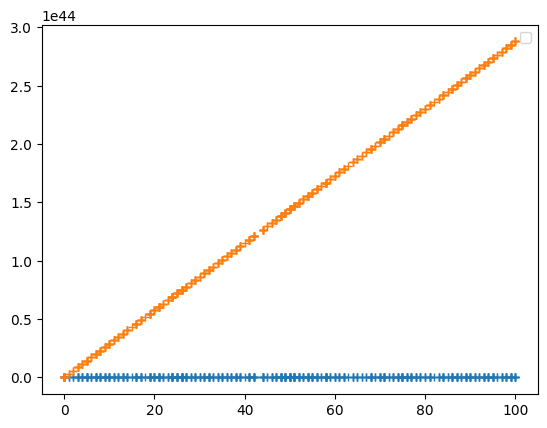

Here we are
 Iteration =19 , Loss=1.431267019958556e+93


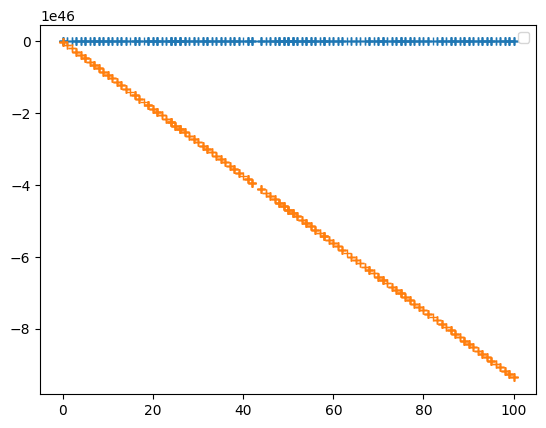

Here we are
 Iteration =20 , Loss=1.5157472762108296e+98


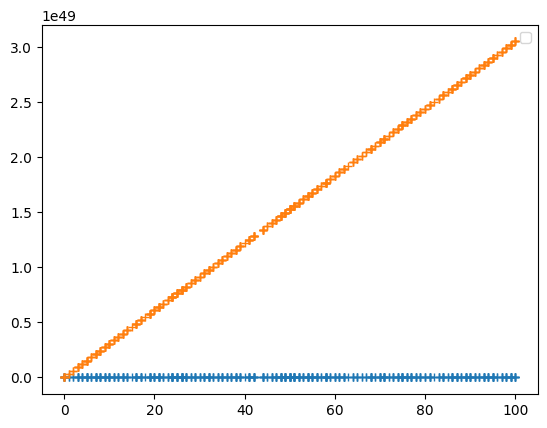

In [ ]:
parameters,loss=train(train_input, train_output, 0.1, 20)

very large fluctations on both sides,

cost(differnce berween original and estimated) actually increasing

correct learning_rate

Here we are
 Iteration =1 , Loss=7.373106526007174


<Figure size 640x480 with 0 Axes>

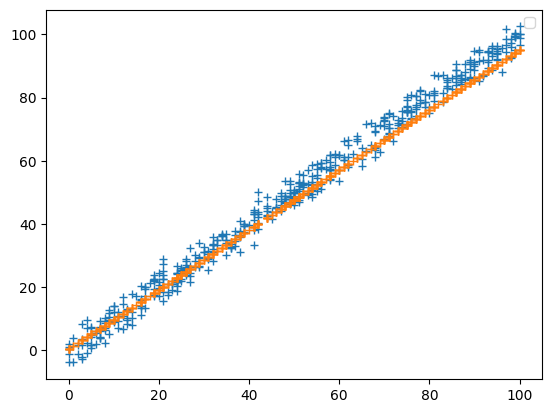

Here we are
 Iteration =2 , Loss=5.4998328853621645


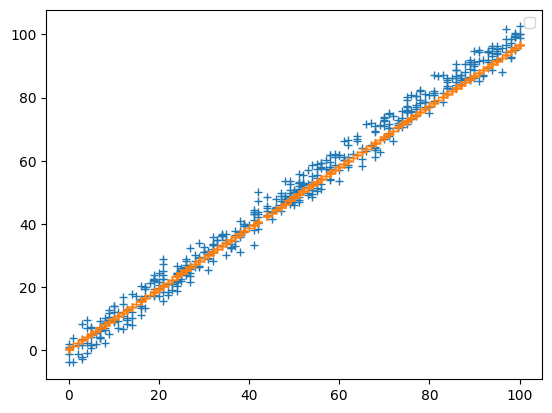

Here we are
 Iteration =3 , Loss=4.649925631770479


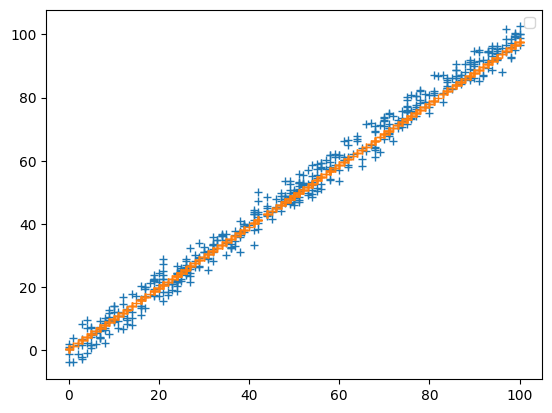

Here we are
 Iteration =4 , Loss=4.264320841554396


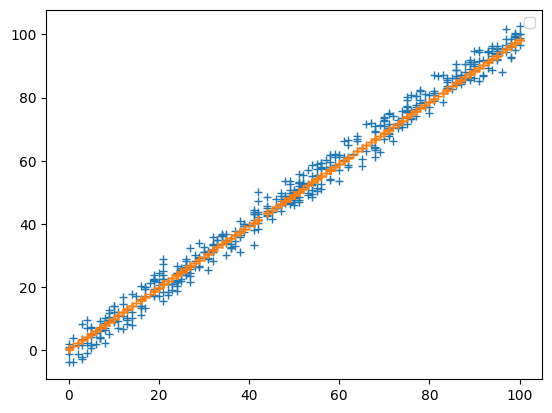

Here we are
 Iteration =5 , Loss=4.089370593299114


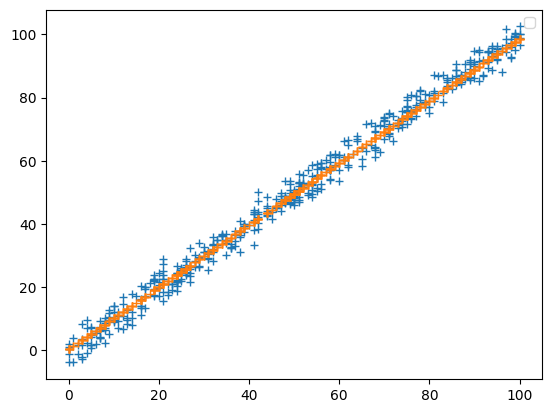

Here we are
 Iteration =6 , Loss=4.0099945441078395


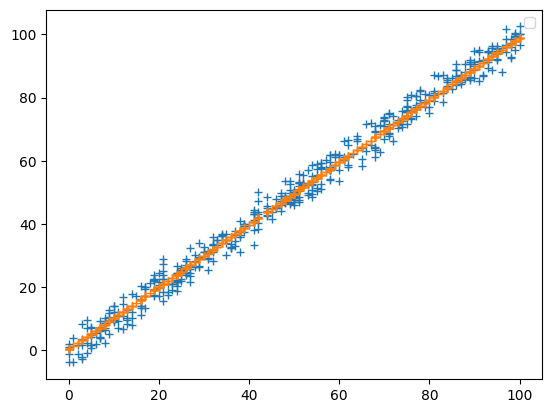

Here we are
 Iteration =7 , Loss=3.9739806149405648


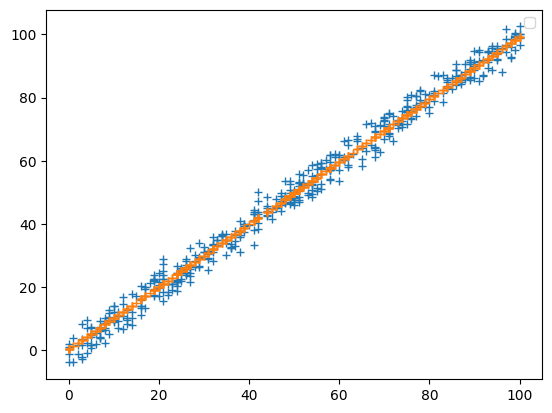

Here we are
 Iteration =8 , Loss=3.957640127704577


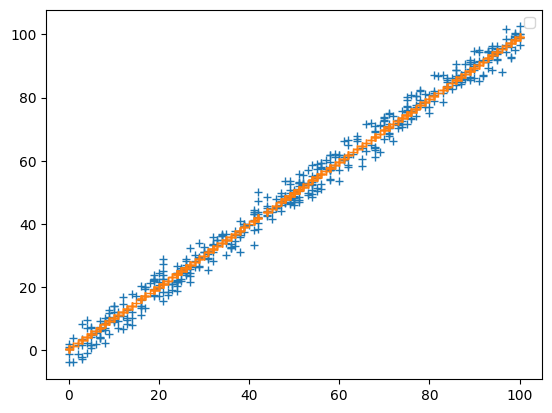

Here we are
 Iteration =9 , Loss=3.9502255029106657


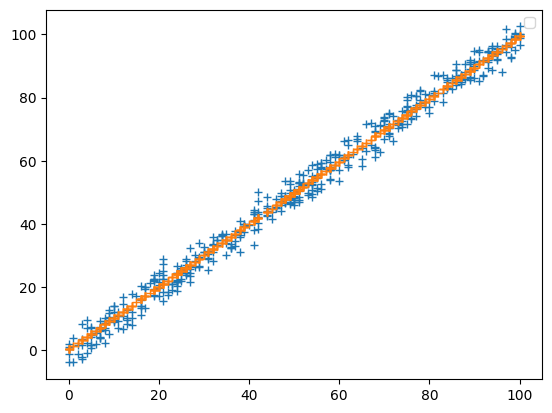

Here we are
 Iteration =10 , Loss=3.9468605518401


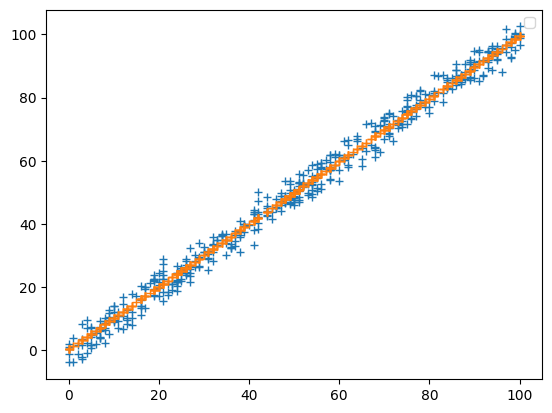

Here we are
 Iteration =11 , Loss=3.9453329422701313


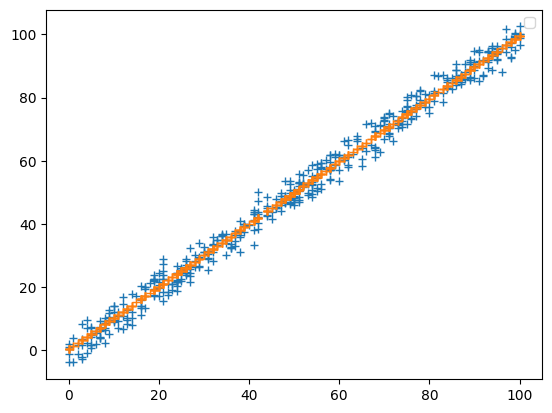

Here we are
 Iteration =12 , Loss=3.9446389366208194


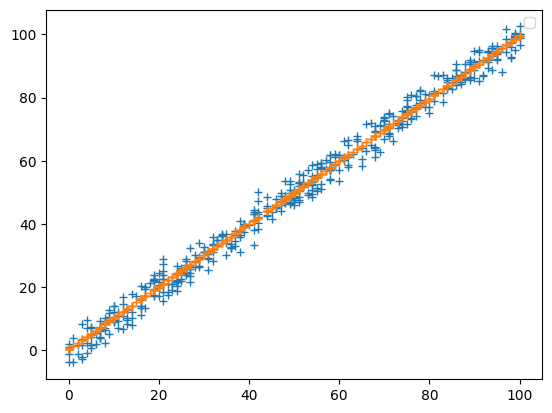

Here we are
 Iteration =13 , Loss=3.9443231380403683


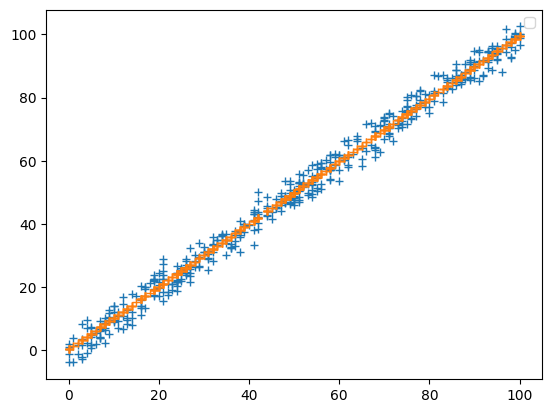

Here we are
 Iteration =14 , Loss=3.9441789324726915


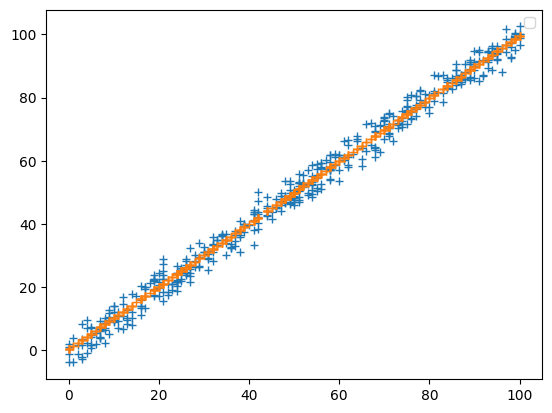

Here we are
 Iteration =15 , Loss=3.9441125788916924


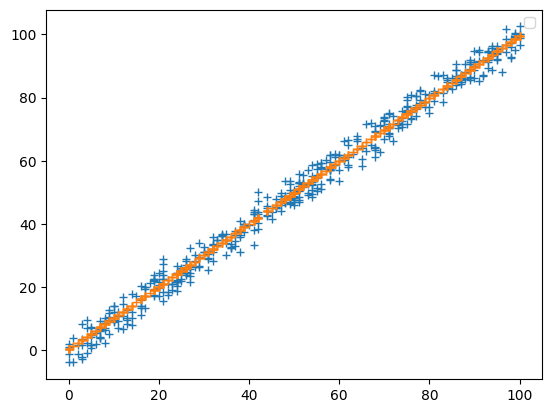

Here we are
 Iteration =16 , Loss=3.9440815468899957


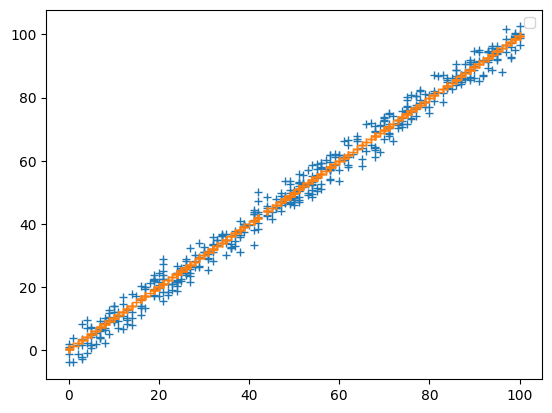

Here we are
 Iteration =17 , Loss=3.9440665403746618


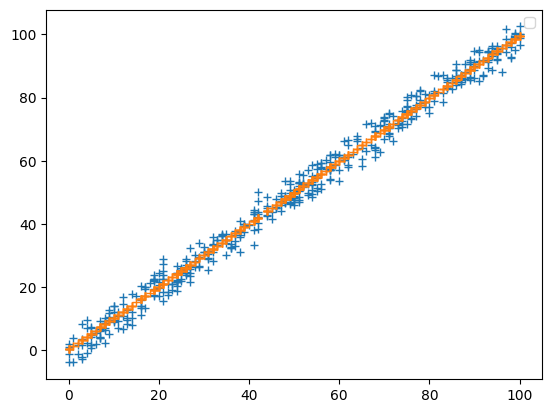

Here we are
 Iteration =18 , Loss=3.944058804686952


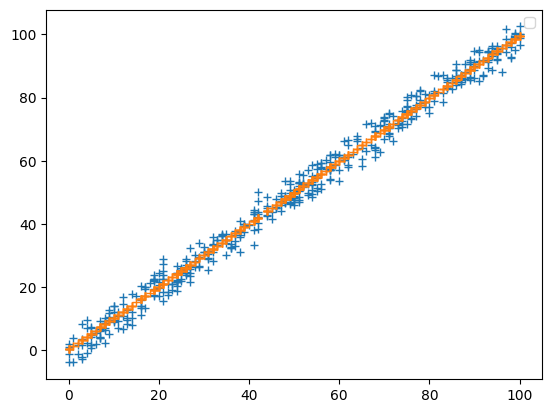

Here we are
 Iteration =19 , Loss=3.9440543678284943


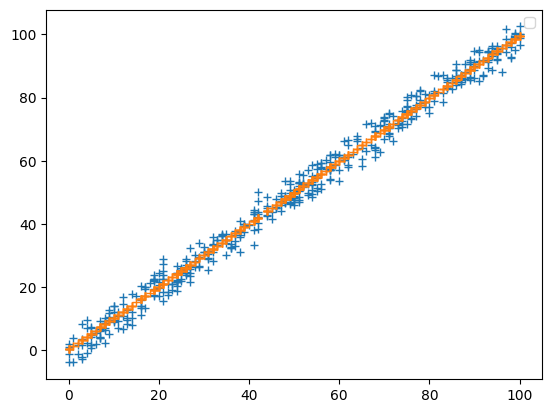

Here we are
 Iteration =20 , Loss=3.944051427699228


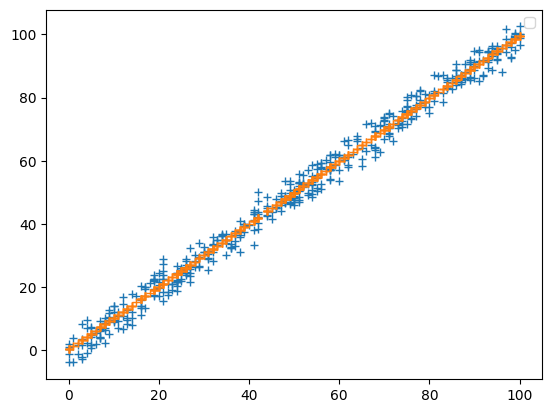

In [ ]:
parameters,loss=train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': 0.9931520357471583, 'c': 0.28111611477199283}


In [ ]:
loss

[7.373106526007174,
 5.4998328853621645,
 4.649925631770479,
 4.264320841554396,
 4.089370593299114,
 4.0099945441078395,
 3.9739806149405648,
 3.957640127704577,
 3.9502255029106657,
 3.9468605518401,
 3.9453329422701313,
 3.9446389366208194,
 3.9443231380403683,
 3.9441789324726915,
 3.9441125788916924,
 3.9440815468899957,
 3.9440665403746618,
 3.944058804686952,
 3.9440543678284943,
 3.944051427699228]

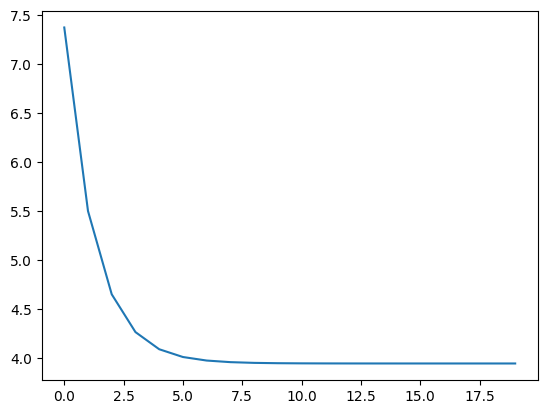

In [ ]:
plt.plot(loss)

**Model Prediction**

In [ ]:
test_predictions=test_input*parameters['m']+parameters['c']

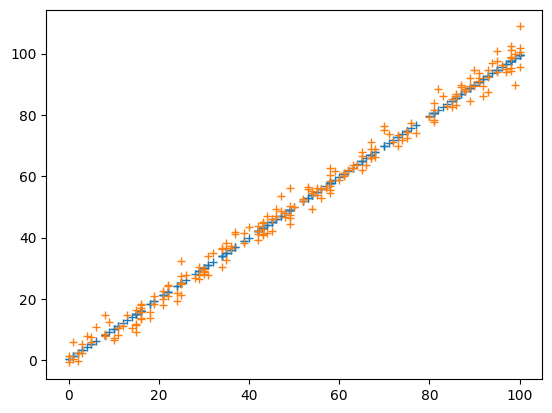

In [ ]:
plt.plot(test_input, test_predictions,"+")
plt.plot(test_input, test_output,"+")
plt.show()

dotted - actual
line- estimated, regression line

In [ ]:
cost_function(test_output,test_predictions)

3.991416302777702

mean error in each predictions~= 3.99

**Linear Regression Using SCIKIT LEARN**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Training Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [ ]:
Params=lr_model.get_params

In [ ]:
print(Params)

<bound method BaseEstimator.get_params of LinearRegression()>


In [ ]:
lr_model.coef_

array([[1.0009993]])

value of m parameter

In [ ]:
lr_model.intercept_

array([-0.23603461])

value of c parameter

**Prediction**

In [ ]:
test_predictions=lr_model.predict(test_input)

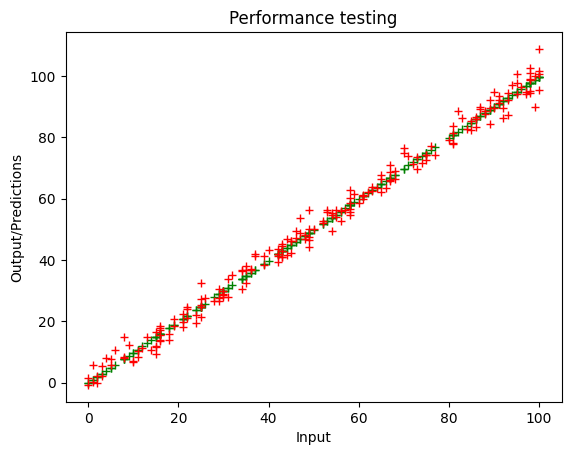

In [ ]:
plt.plot(test_input,test_predictions,"+",color='green')
plt.plot(test_input,test_output,"+",color='red')
plt.title('Performance testing')
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

cost=mean_squared_error(test_output, test_predictions)
cost

8.030031591835378

**ASSUMPTIONS OF LINEAR REGRESSION**

HOMOSCEDASTICITY

residuals- errors ka array

In [42]:
residuals=test_predictions-test_output

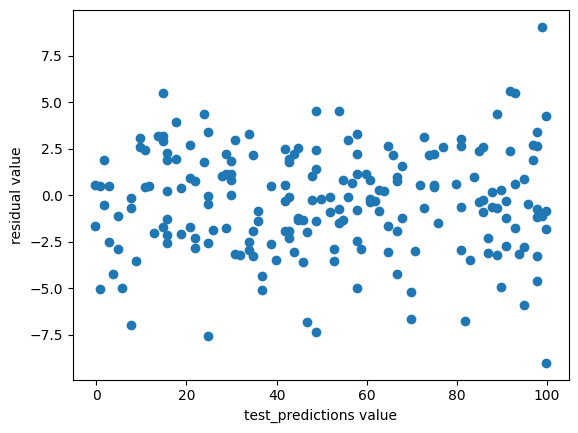

In [43]:
plt.scatter(test_predictions, residuals)
plt.xlabel('test_predictions value')
plt.ylabel('residual value')
plt.show()

it is completly random , no relation b/w residual and test_predictions ---- model is well trained

NORMAILTY OF RESIDUALS

In [44]:
import seaborn as sns

<ipython-input-45-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

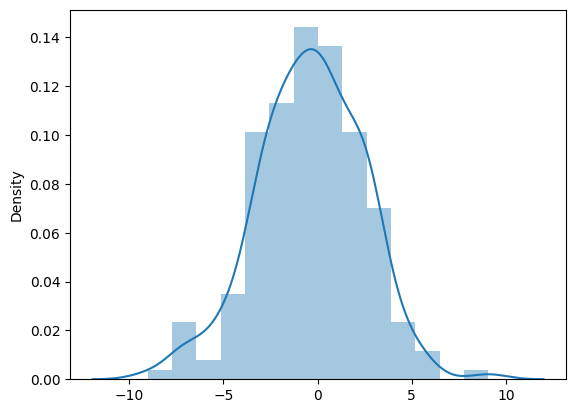

In [45]:
sns.distplot(residuals)

most of error alligning on 0, closer to - model is well trained

if same graph shifted to right or left, model is not trained well

if all error on 0- model is perfect